### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Load data

In [4]:
df_dev_to = pd.read_csv(r"results\data.csv")
df_dev_to.head(5)

,id,title,number_reactions,number_comments,tags,minutes_to_read
0,1816487,The guide to Git I never had.,260,26.0,"webdev, beginners, programming, tutorial",12
1,1817475,Top 5 fastest growing JavaScript repos,269,29.0,"opensource, javascript, github, webdev",5
2,1813349,How I write Commits like a pro,155,27.0,"git, github, softwaredevelopment, fullstack",2
3,1815137,Someone finally fixed Javascript,137,42.0,"javascript, typescript",4
4,1818743,Build an AI-powered blogging platform (Next.js...,302,20.0,"webdev, tutorial, programming, javascript",14


In [ ]:
df_dev_to.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                50 non-null     int64 
 1   title             50 non-null     object
 2   number_reactions  50 non-null     int64 
 3   number_comments   50 non-null     int64 
 4   tags              50 non-null     object
 5   minutes_to_read   50 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


### Objectives - Questions

- Which tags appear most frequently?
- What is the typical minimum reading time?
- Which words appear most frequently in the titles?
- Which tags have the most reactions?
- Which tags have the most comments?

### Functions

In [ ]:
def count_tag_occurrences(tags):
    tags_counts = {}
    for tag in tags:
        split_tags = tag.split(", ")
        for individual_tag  in split_tags:
            tags_counts[individual_tag] = tags_counts.get(individual_tag, 0) + 1
    return tags_counts

def count_occurrences_with_threshold(word_counts, threshold):
    # Group tags with frequency below the threshold under the "other" category
    other_count = 0
    filtered_tags = {}
    for tag, count in word_counts.items():
        if count >= threshold:
            filtered_tags[tag] = count
        else:
            other_count += count

    if other_count > 0:
        filtered_tags['other'] = other_count

    return filtered_tags

In [ ]:
tags = df_dev_to["tags"]

tag_counts = count_tag_occurrences(tags)
for palavra, contagem in sorted(tag_counts.items(), key=lambda item: item[1], reverse=True):
    print(f'A palavra "{palavra}" ocorre {contagem} vezes.')

A palavra "webdev" ocorre 19 vezes.
A palavra "javascript" ocorre 13 vezes.
A palavra "programming" ocorre 12 vezes.
A palavra "discuss" ocorre 9 vezes.
A palavra "beginners" ocorre 8 vezes.
A palavra "learning" ocorre 7 vezes.
A palavra "career" ocorre 6 vezes.
A palavra "opensource" ocorre 6 vezes.
A palavra "productivity" ocorre 6 vezes.
A palavra "tutorial" ocorre 5 vezes.
A palavra "devchallenge" ocorre 4 vezes.
A palavra "ai" ocorre 4 vezes.
A palavra "css" ocorre 4 vezes.
A palavra "codenewbie" ocorre 3 vezes.
A palavra "frontendchallenge" ocorre 3 vezes.
A palavra "typescript" ocorre 3 vezes.
A palavra "softwareengineering" ocorre 3 vezes.
A palavra "devops" ocorre 2 vezes.
A palavra "coding" ocorre 2 vezes.
A palavra "github" ocorre 2 vezes.
A palavra "frontend" ocorre 2 vezes.
A palavra "node" ocorre 2 vezes.
A palavra "meta" ocorre 2 vezes.
A palavra "html" ocorre 2 vezes.
A palavra "api" ocorre 2 vezes.
A palavra "top7" ocorre 2 vezes.
A palavra "braziliandevs" ocorre 2 vez

Text(0.5, 1.0, 'Distribuição de tags nos Artigos')

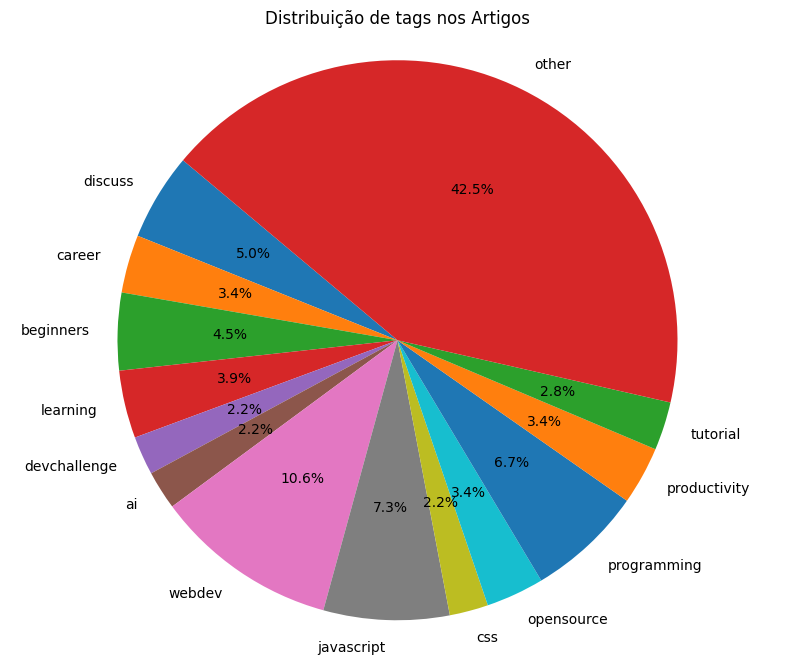

In [ ]:
filtered_tags_for_pie = count_occurrences_with_threshold(tag_counts, 4)
labels= filtered_tags_for_pie.keys()
sizes = filtered_tags_for_pie.values()

# Cria o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Garante que o gráfico de pizza seja desenhado como um círculo

# Adiciona um título
plt.title('Distribuição de tags nos Artigos')

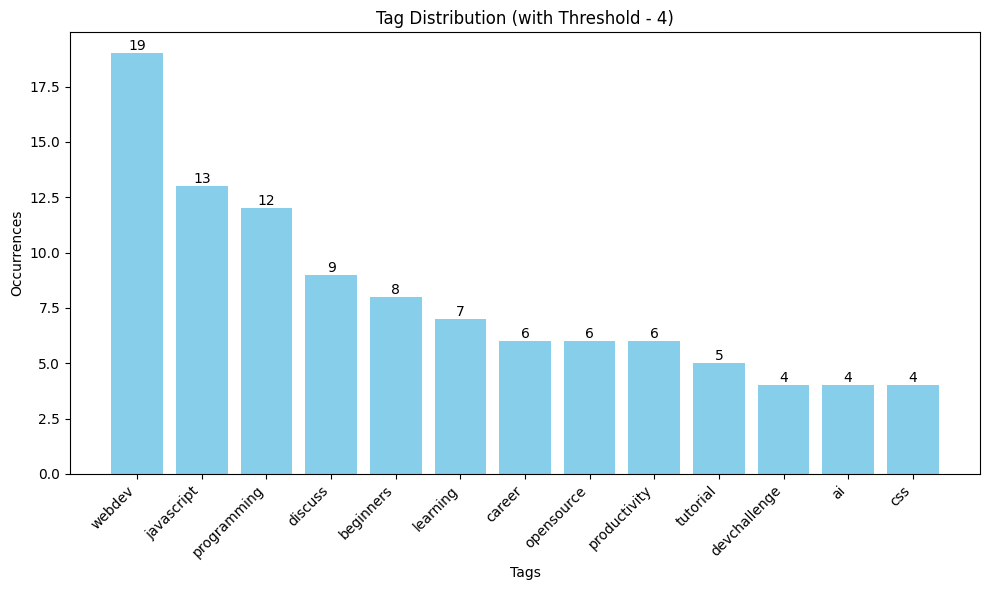

In [ ]:

sorted_tags = sorted(filtered_tags_for_pie.items(), key=lambda item: item[1], reverse=True)

# Prepare data for the bar chart
labels = [tag[0] for tag in sorted_tags]
sizes = [tag[1] for tag in sorted_tags]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels[1:], sizes[1:], color='skyblue')

# Add labels and title
plt.xlabel('Tags')
plt.ylabel('Occurrences')
plt.title('Tag Distribution (with Threshold - 4)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

for bar, size in zip(bars, sizes[1:]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(size), ha='center', va='bottom')
# Display the chart
plt.tight_layout()
plt.show()

discuss, career, beginners, learning cloudflarechallenge, devchallenge, ai, serverless webdev, javascript, career, codenewbie frontendchallenge, devchallenge, css, javascript devops, opensource, tooling, cicd webdev, javascript, programming, opensource discuss, productivity, opensource, learning ai, python, opensource, webdev git, coding, github, learning webdev, tutorial, javascript, programming webdev, javascript, frontend, node webdev, beginners, programming, career softwaredevelopment, programming, webdev, beginners typescript meta, shakethingsup, perfectlycromulent, marquee showdev, machinelearning, javascript, ai discuss, google, web react, typescript, webdev, programming webdev, css, html, programming programming, backend, softwareengineering, productivity webdev, javascript, tutorial, frontend webdev, javascript, node, devops webdev, vscode api, webdev, javascript, programming interview, moderation, community, meta discuss, programming, productivity, learning developer, program

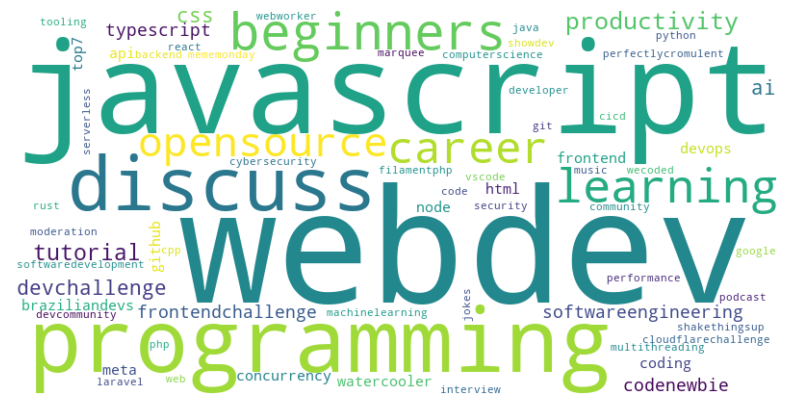

In [ ]:
words_list = df_dev_to["tags"]
text = ' '.join(words_list)
print(text)
# Generate a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Analisar tamanho dos artigos

In [ ]:
df_dev_to["minutes_to_read"].mean()

4.84

In [ ]:
df_dev_to["minutes_to_read"].describe()

count    50.000000
mean      4.840000
std       4.166729
min       1.000000
25%       2.250000
50%       4.000000
75%       5.750000
max      23.000000
Name: minutes_to_read, dtype: float64

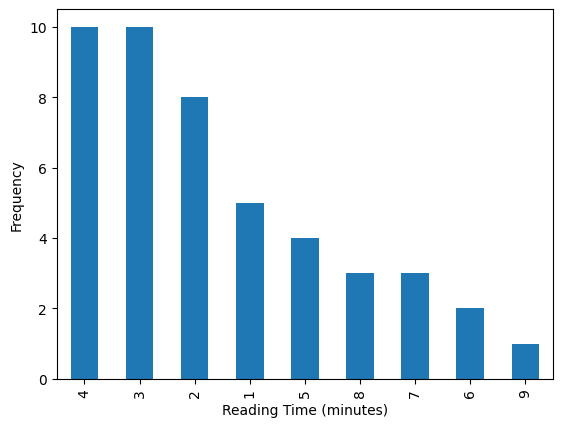

count     9.000000
mean      5.111111
std       3.407508
min       1.000000
25%       3.000000
50%       4.000000
75%       8.000000
max      10.000000
Name: count, dtype: float64

In [ ]:
column_minutes_to_read = df_dev_to[df_dev_to["minutes_to_read"]< 10]["minutes_to_read"].value_counts()

# Creating the bar plot
column_minutes_to_read.plot.bar()

# Adding labels to the axes
plt.xlabel('Reading Time (minutes)')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()
column_minutes_to_read.describe()

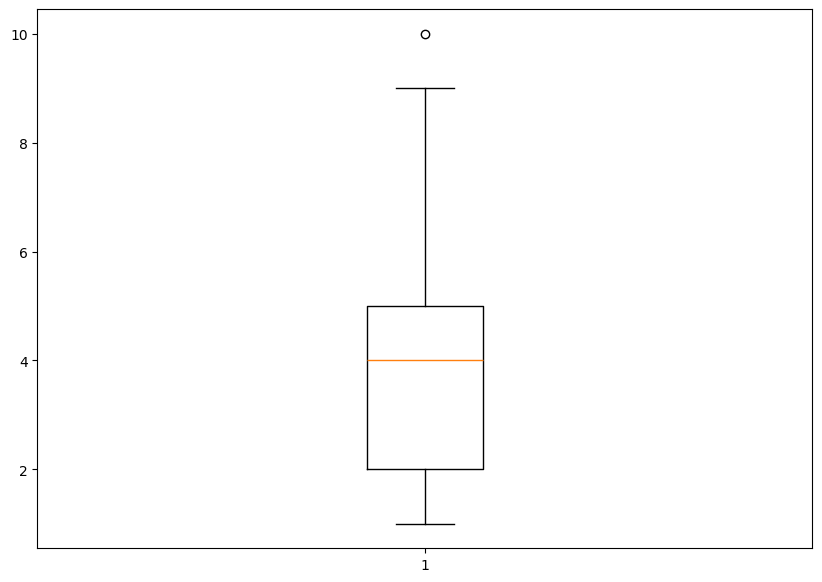

count    47.000000
mean      3.978723
std       2.260140
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max      10.000000
Name: minutes_to_read, dtype: float64

In [ ]:
df_dev_to.corr(numeric_only=True)

,id,number_reactions,number_comments,minutes_to_read
id,1.000000,0.103553,0.139519,0.050202
number_reactions,0.103553,1.000000,0.293945,0.431226
number_comments,0.139519,0.293945,1.000000,-0.240043
minutes_to_read,0.050202,0.431226,-0.240043,1.000000


In [ ]:
# Convert the list to a single string with space-separated words
words_list = df_dev_to["title"]
text = ' '.join(words_list)
# Generate a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


### Word cloud titles

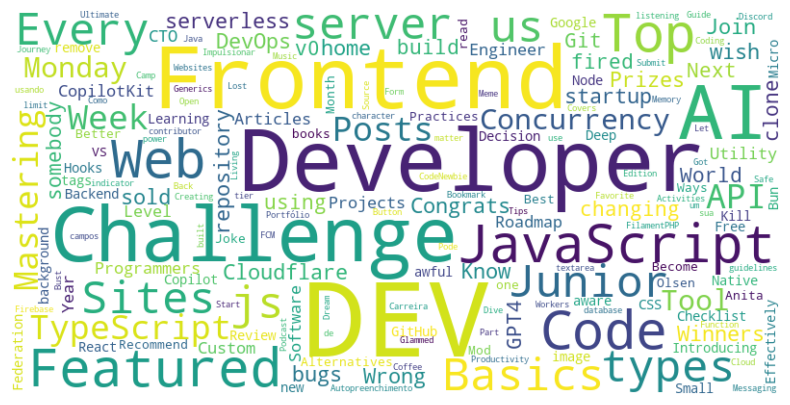

In [ ]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_dev_to["number_comments"].describe()

count    50.000000
mean     18.780000
std      18.175213
min       1.000000
25%       4.000000
50%      11.500000
75%      29.500000
max      68.000000
Name: number_comments, dtype: float64

In [ ]:
df_dev_to_sorted_comments = df_dev_to.sort_values(by='number_comments', ascending=False)

articles_most_commented = df_dev_to_sorted_comments.head(10)

In [ ]:
tag_counts_most_commented_articles = count_tag_occurrences(articles_most_commented["tags"])

tag_counts_most_commented_articles

{'discuss': 4,
 'career': 2,
 'coding': 2,
 'programming': 3,
 'webdev': 3,
 'css': 2,
 'html': 1,
 'cloudflarechallenge': 1,
 'devchallenge': 2,
 'ai': 1,
 'serverless': 1,
 'javascript': 2,
 'node': 1,
 'devops': 1,
 'watercooler': 1,
 'music': 1,
 'beginners': 2,
 'learning': 2,
 'git': 1,
 'github': 1,
 'frontendchallenge': 1,
 'softwaredevelopment': 1,
 'productivity': 1}

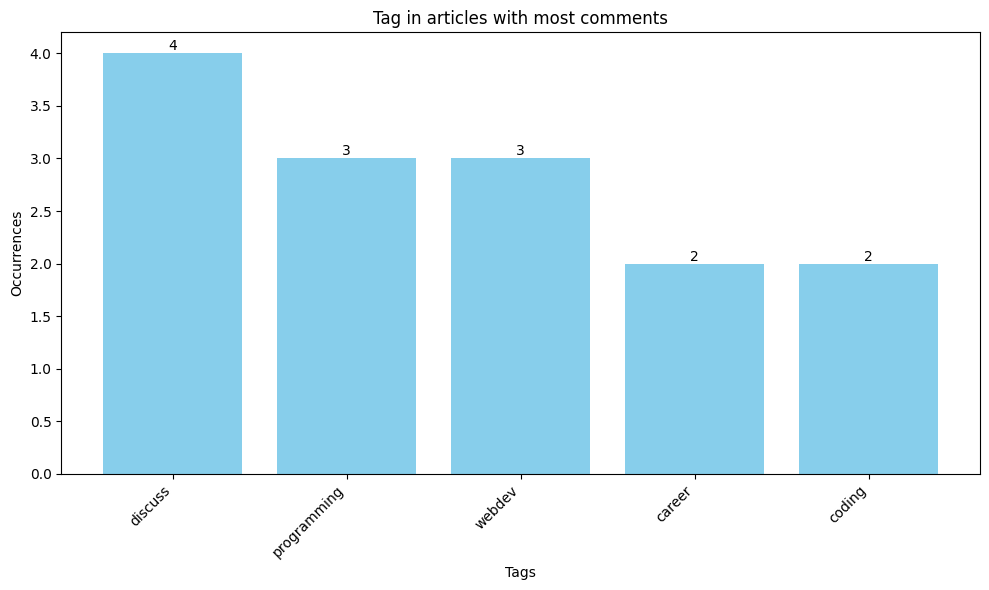

In [ ]:
sorted_tags = sorted(tag_counts_most_commented_articles.items(), key=lambda item: item[1], reverse=True)

sorted_tags = sorted_tags[:5]
# Prepare data for the bar chart
labels = [tag[0] for tag in sorted_tags]
sizes = [tag[1] for tag in sorted_tags]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color='skyblue')

# Add labels and title
plt.xlabel('Tags')
plt.ylabel('Occurrences')
plt.title('Tag in articles with most comments')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(size), ha='center', va='bottom')
# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
df_dev_to_sorted_reactions = df_dev_to.sort_values(by='number_reactions', ascending=False)

articles_most_reacted = df_dev_to_sorted_reactions.head(10)

In [ ]:
tag_counts_articles_most_reacted = count_tag_occurrences(articles_most_reacted["tags"])

tag_counts_articles_most_reacted

{'webdev': 5,
 'javascript': 4,
 'programming': 3,
 'opensource': 3,
 'tutorial': 1,
 'ai': 2,
 'python': 1,
 'discuss': 1,
 'career': 3,
 'beginners': 2,
 'learning': 1,
 'cloudflarechallenge': 1,
 'devchallenge': 2,
 'serverless': 1,
 'frontendchallenge': 1,
 'css': 1,
 'codenewbie': 1,
 'devops': 1,
 'tooling': 1,
 'cicd': 1,
 'typescript': 1}

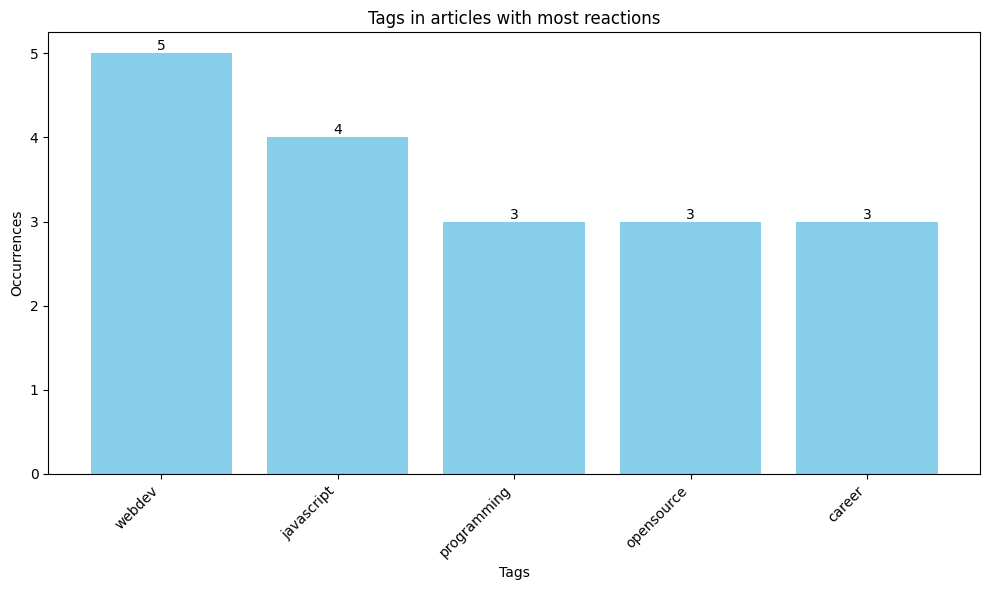

In [ ]:
sorted_tags = sorted(tag_counts_articles_most_reacted.items(), key=lambda item: item[1], reverse=True)

sorted_tags = sorted_tags[:5]
# Prepare data for the bar chart
labels = [tag[0] for tag in sorted_tags]
sizes = [tag[1] for tag in sorted_tags]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color='skyblue')

# Add labels and title
plt.xlabel('Tags')
plt.ylabel('Occurrences')
plt.title('Tags in articles with most reactions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(size), ha='center', va='bottom')
# Display the chart
plt.tight_layout()
plt.show()